<a href="https://colab.research.google.com/github/JJYL94/Machine-Learning-Credit-Default-Prediction/blob/main/Gradient_Boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots #import new library
import sklearn
from sklearn.impute import SimpleImputer

# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
#plt.style.use('bmh')
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
C_Default = pd.read_csv("/content/drive/MyDrive/Innovation Studio/credit card default app_data.csv")
Cred_Default = pd.DataFrame(C_Default) # convert to data frame
Cred_Default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_CONTRACT_STATUS
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.500,24700.500,351000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019,-9461,-637,-3648.000,-2120,NaN,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083,0.263,0.139,0.025,0.037,0.972,0.619,0.014,0.000,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000,0.025,0.038,0.972,0.634,0.014,0.000,0.069,0.083,0.125,0.038,0.022,0.020,0.000,0.000,0.025,0.037,0.972,0.624,0.014,0.000,0.069,0.083,0.125,0.037,0.021,0.019,0.000,0.000,reg oper account,block of flats,0.015,"Stone, brick",No,2.000,2.000,2.000,2.000,-1134,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,1.000,Approved
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.500,35698.500,1129500.000,Family,State servant,Higher education,Married,House / apartment,0.004,-16765,-1188,-1186.000,-291,NaN,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311,0.622,NaN,0.096,0.053,0.985,0.796,0.060,0.080,0.035,0.292,0.333,0.013,0.077,0.055,0.004,0.010,0.092,0.054,0.985,0.804,0.050,0.081,0.035,0.292,0.333,0.013,0.079,0.055,0.000,0.000,0.097,0.053,0.985,0.799,0.061,0.080,0.035,0.292,0.333,0.013,0.079,0.056,0.004,0.010,reg oper account,block of flats,0.071,Block,No,1.000,0.000,1.000,0.000,-828,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000,0.000,0.000,0.000,0.000,0.000,Approved
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.000,6750.000,135000.000,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010,-19046,-225,-4260.000,-2531,26.000,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.556,0.730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
Cred_Default.shape

(307511, 123)

# Clean Data

In [ ]:
Cred_Default['DOCUMENTS_GIVEN'] = Cred_Default.iloc[:, 96:115].sum(axis=1)
Cred_Default.drop(Cred_Default.iloc[:, 96:116], inplace = True, axis = 1)
Cred_Default.drop(Cred_Default.iloc[:, 41:90], inplace = True, axis = 1)
Cred_Default.drop((['OWN_CAR_AGE']), inplace = True, axis = 1)
Cred_Default.drop((['EMERGENCYSTATE_MODE']), inplace = True, axis = 1)

Quick Clean - already been done in Feature Engineering file

In [ ]:
Cred_Default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 53 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

# Data Preparation



In order to fit the categorical attributes into the correlation matrix and test for statistical significance, I had to convert some key observations into binary values (i.e 1 and 0):

NAME_CONTRACT_TYPE = "Cash loans"--> 1, otherwise 0

CODE_GENDER = "M" --> 1, otherwise 0

FLAG_OWN_CAR = "N" --> 1, otherwise 0

FLAG_OWN_REALTY = "N" --> 1, otherwise 0

NAME_TYPE_SUITE = "Unaccompanied" --> 1, otherwise 0

NAME_INCOME_TYPE = "Working" --> 1, otherwise 0

NAME_EDUCATION_TYPE = "Secondary / secondary special" --> 1, otherwise 0

NAME_HOUSING_TYPE = "House / apartment" --> 1, otherwise 0

PREV_CONTRACT_STATUS = "Approved" --> 0, otherwise 1

Most of the other features unfortunately have too much cardinality to easily convert into binary values

In [ ]:
Cred_Default['NAME_CONTRACT_TYPE'] = (Cred_Default['NAME_CONTRACT_TYPE'] == "Cash loans").astype("int64")
Cred_Default['CODE_GENDER'] = (Cred_Default['CODE_GENDER'] == "M").astype("int64")
Cred_Default['FLAG_OWN_CAR'] = (Cred_Default['FLAG_OWN_CAR'] == "N").astype("int64")
Cred_Default['FLAG_OWN_REALTY'] = (Cred_Default['FLAG_OWN_REALTY'] == "N").astype("int64")
Cred_Default['NAME_TYPE_SUITE'] = (Cred_Default['NAME_TYPE_SUITE'] == "Unaccompanied").astype("int64")
Cred_Default['NAME_HOUSING_TYPE'] = (Cred_Default['NAME_HOUSING_TYPE'] == "House / apartment").astype("int64")
Cred_Default['NAME_INCOME_TYPE'] = (Cred_Default['NAME_INCOME_TYPE'] == "Working").astype("int64")
Cred_Default['NAME_EDUCATION_TYPE'] = (Cred_Default['NAME_EDUCATION_TYPE'] == "Secondary / secondary special").astype("int64")
Cred_Default['PREV_CONTRACT_STATUS'] = (Cred_Default['PREV_CONTRACT_STATUS'] != "Approved").astype("int64")

Cred_Default.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,PREV_CONTRACT_STATUS,DOCUMENTS_GIVEN
0,100002,1,1,1,1,0,0,202500.000,406597.500,24700.500,351000.000,1,1,1,Single / not married,1,0.019,-9461,-637,-3648.000,-2120,1,1,0,1,1,0,Laborers,1.000,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,2.000,2.000,2.000,2.000,-1134,0.000,0.000,0.000,0.000,0.000,1.000,0,1
1,100003,0,1,0,1,1,0,270000.000,1293502.500,35698.500,1129500.000,0,0,0,Married,1,0.004,-16765,-1188,-1186.000,-291,1,1,0,1,1,0,Core staff,2.000,1,1,MONDAY,11,0,0,0,0,0,0,School,1.000,0.000,1.000,0.000,-828,0.000,0.000,0.000,0.000,0.000,0.000,0,1
2,100004,0,0,1,0,0,0,67500.000,135000.000,6750.000,135000.000,1,1,1,Single / not married,1,0.010,-19046,-225,-4260.000,-2531,1,1,1,1,1,0,Laborers,1.000,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.000,0.000,0.000,0.000,-815,0.000,0.000,0.000,0.000,0.000,0.000,0,0
3,100006,0,1,0,1,0,0,135000.000,312682.500,29686.500,297000.000,1,1,1,Civil marriage,1,0.008,-19005,-3039,-9833.000,-2437,1,1,0,1,0,0,Laborers,2.000,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,2.000,0.000,2.000,0.000,-617,NaN,NaN,NaN,NaN,NaN,NaN,0,1
4,100007,0,1,1,1,0,0,121500.000,513000.000,21865.500,513000.000,1,1,1,Single / not married,1,0.029,-19932,-3038,-4311.000,-3458,1,1,0,1,0,0,Core staff,1.000,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.000,0.000,0.000,0.000,-1106,0.000,0.000,0.000,0.000,0.000,0.000,0,1


# Model Building

In [ ]:
# These 15 features have been selected based on the EDA_FeatureEngineering Python code
model_1 = Cred_Default[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_CREDIT', 'NAME_INCOME_TYPE', 'DAYS_BIRTH', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE', 'REGION_RATING_CLIENT_W_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY', 'DAYS_LAST_PHONE_CHANGE', 'PREV_CONTRACT_STATUS', 'DOCUMENTS_GIVEN']]

In [ ]:
model_1.isnull().sum()

TARGET                         0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
AMT_CREDIT                     0
NAME_INCOME_TYPE               0
DAYS_BIRTH                     0
NAME_EDUCATION_TYPE            0
NAME_HOUSING_TYPE              0
FLAG_WORK_PHONE                0
REGION_RATING_CLIENT_W_CITY    0
LIVE_CITY_NOT_WORK_CITY        0
REG_CITY_NOT_LIVE_CITY         0
DAYS_LAST_PHONE_CHANGE         0
PREV_CONTRACT_STATUS           0
DOCUMENTS_GIVEN                0
dtype: int64

In [ ]:
model_1.tail()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_CREDIT,NAME_INCOME_TYPE,DAYS_BIRTH,NAME_EDUCATION_TYPE,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,REGION_RATING_CLIENT_W_CITY,LIVE_CITY_NOT_WORK_CITY,REG_CITY_NOT_LIVE_CITY,DAYS_LAST_PHONE_CHANGE,PREV_CONTRACT_STATUS,DOCUMENTS_GIVEN
307506,0,1,1,1,254700.000,1,-9327,1,0,0,1,0,0,-273,0,1
307507,0,1,0,1,269550.000,0,-20775,1,1,0,2,0,0,0,0,1
307508,0,1,0,1,677664.000,1,-14966,0,1,0,3,1,0,-1909,0,1
307509,1,1,0,1,370107.000,0,-11961,1,1,0,2,0,1,-322,0,1
307510,0,1,0,1,675000.000,0,-16856,0,1,1,1,1,0,-787,0,1


In [ ]:
X, y = model_1.iloc[:, model_1.columns != 'TARGET'], model_1.iloc[:, 0] # X - include all features until the end, Y - include only 1st column which is TARGET

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state = 42)

Stratified Train-Test split so the set distributions are the same as the population distribution.

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library and generate synthetic data points
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1.0, random_state = 42) # Minority class is 50% the number of examples in majority class
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 19860
Before OverSampling, counts of label '0': 226148 

After OverSampling, the shape of train_X: (452296, 15)
After OverSampling, the shape of train_y: (452296,) 

After OverSampling, counts of label '1': 226148
After OverSampling, counts of label '0': 226148


Using SMOTE, we have now oversampled the minority class to be balanced with the majority class. Note that the Gradient Boosting model does not require normalisation.

# Gradient Boosting

Gradient Boosting is an ensemble learning method that combines multiple weak models to create a stronger model. It works by iteratively adding new models to the ensemble, each correcting the mistakes of the previous model. At each iteration, the gradient boosting algo fits a new model to the negative gradient of a loss function, with respect to the current ensemble prediction.

Eventually, all model predictions are combined by weighting them according to their performance on the training data.

In [ ]:
# Load Library
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score
import numpy as np

In [ ]:
# Create an instance of the classifier
model_gb = xgb.XGBClassifier(learning_rate = 1.8, n_estimators= 300, max_depth = 2)

In [ ]:
# Fit classifier to the training data
model_gb.fit(X_train_res, y_train_res)

XGBClassifier(learning_rate=1.8, max_depth=2, n_estimators=300)

In [ ]:
gb_predictions = model_gb.predict(X_test)

In [ ]:
# Obtain score on train data
train_score = model_gb.score(X_train_res, y_train_res)
print("Train Accuracy: ", train_score)

Train Accuracy:  0.6849032491996392


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, gb_predictions))

              precision    recall  f1-score   support

           0       0.93      0.68      0.78     56538
           1       0.09      0.38      0.15      4965

    accuracy                           0.66     61503
   macro avg       0.51      0.53      0.47     61503
weighted avg       0.86      0.66      0.73     61503



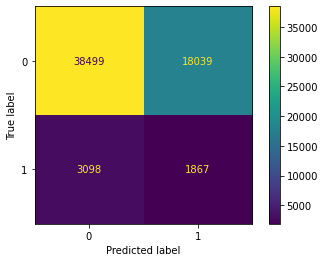

In [ ]:
cm_gb = confusion_matrix(y_test, gb_predictions, labels=model_gb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=model_gb.classes_)

disp.plot()

plt.show()

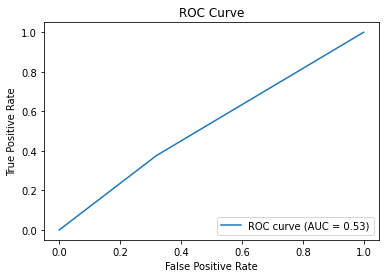

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, gb_predictions)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# specify the hyperparameters and their possible values
param_grid_gb = {
    'max_depth': [2, 10, 20, 30, 'none'],
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.2, 0.3, 1.0]
}

grid_search_gb = GridSearchCV(estimator = model_gb2, param_grid = param_grid_gb, scoring = "recall_macro", cv = 5)
grid_search_gb.fit(X_train_res, y_train_res)

print("Best parameters: ",
      grid_search_gb.best_params_)
print("Best score: ",
      grid_search_gb.best_score_)

It turns out that this hyperparameter optimisation was far too computationally and time intensive (> 2 hrs). Trial and error of different hyperparameters was used to compute what we believed were optimal results.